In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 5.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.3 MB/s 


# import all necessary libraries for the machine learning project

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection
# import the keras auto tuner 
import keras_tuner as kt

# Download the dataset using kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d rohanrao/air-quality-data-in-india

 78% 57.0M/72.9M [00:00<00:00, 130MB/s]
100% 72.9M/72.9M [00:00<00:00, 144MB/s]


In [ ]:
!unzip /content/air-quality-data-in-india.zip

Archive:  /content/air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [ ]:
#read the data
data=pd.read_csv('/content/city_hour.csv')
data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


#Preprocessing the Datasets 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
# Check whether some values are NaN or not
pd.isna(data).sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [ ]:
#Dropping columns having a missing values
data.dropna(inplace=True)

In [ ]:
pd.isna(data).sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dc9599690>,
      dtype=object)

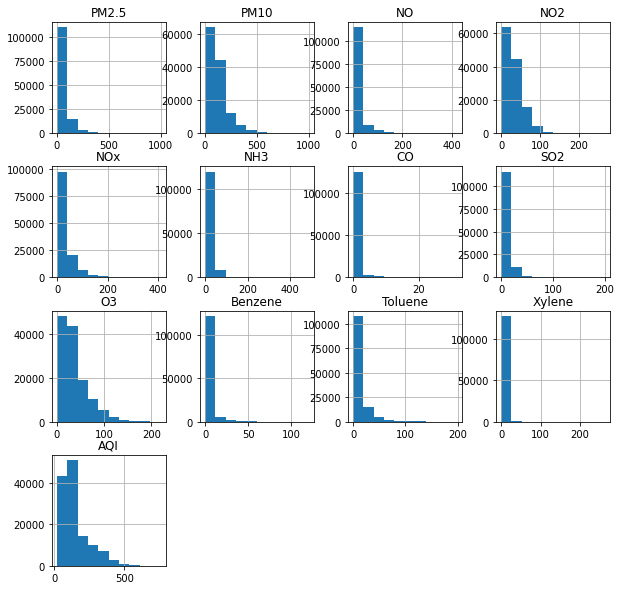

In [ ]:
data.hist(figsize=(10,10))

In [ ]:
#The describe() method returns description of the data in the DataFrame.
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000
mean,63.920899,128.279759,18.108749,32.815853,34.225690,21.820122,1.030950,11.281448,36.352084,3.912114,11.344988,2.566608,145.405873
std,62.152594,99.378185,28.985743,23.036079,35.307825,18.102877,1.572615,10.353600,27.687567,5.858445,15.042199,5.346189,97.011021
min,0.030000,1.000000,0.010000,0.100000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,18.000000
25%,27.000000,63.750000,3.560000,15.420000,13.410000,10.320000,0.430000,5.500000,16.770000,0.940000,2.350000,0.220000,79.000000
50%,47.500000,101.500000,8.240000,27.200000,22.970000,15.350000,0.700000,8.830000,28.220000,2.250000,6.200000,1.000000,114.000000
75%,76.500000,157.400000,17.820000,44.100000,40.180000,29.560000,1.070000,13.600000,48.600000,4.560000,13.940000,2.690000,176.000000
max,999.990000,1000.000000,419.780000,266.730000,408.250000,485.520000,31.620000,199.930000,219.780000,120.080000,198.050000,261.950000,760.000000


In [ ]:
# drop out the city and datetime columns 
data=data[data.City=='Amaravati']
data.drop(columns=['City','Datetime'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#find the unique elements of an array
data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good'],
      dtype=object)

In [ ]:
# drop the rows with the Severe
data=data[data.AQI_Bucket != 'Severe']

In [ ]:
# create new dataset the balance 
new_dataset=data[data.AQI_Bucket=='Poor']
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Moderate'].iloc[:14000])
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Satisfactory'].iloc[:14000])

new_dataset=new_dataset.append(data[data.AQI_Bucket=='Very Poor'])
new_dataset=new_dataset.append(data[data.AQI_Bucket=='Good'])
new_dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50914,21.00,122.50,1.35,14.78,8.93,10.40,0.10,31.10,176.40,0.20,5.12,0.08,221.0,Poor
50915,70.25,110.25,1.57,28.10,16.22,6.20,0.10,107.92,149.47,0.20,5.05,0.00,221.0,Poor
50916,64.00,105.00,1.50,20.38,12.05,7.65,0.10,98.58,142.10,0.10,4.25,0.00,221.0,Poor
50917,60.50,103.75,1.75,23.83,14.15,8.90,0.10,62.57,145.05,0.10,3.77,0.03,221.0,Poor
50918,57.00,96.50,1.35,17.02,10.15,9.92,0.10,43.23,148.00,0.10,5.10,0.00,221.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73609,23.00,37.00,1.30,11.97,7.40,13.00,0.77,12.93,30.15,0.20,1.20,0.10,41.0,Good
73610,28.25,38.75,1.30,11.47,7.15,12.70,0.72,13.42,25.70,0.20,1.12,0.10,40.0,Good
73615,24.75,34.50,2.35,8.75,6.55,11.95,0.67,14.12,35.83,0.12,0.85,0.10,40.0,Good
73641,7.00,15.00,2.65,12.27,8.70,11.55,0.64,13.70,37.45,0.23,14.65,0.23,49.0,Good


In [ ]:
# convert the labels to numerical value
data.AQI_Bucket.factorize()

(array([0, 0, 0, ..., 3, 3, 3]),
 Index(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good'], dtype='object'))

In [ ]:
# convert the labels to numerical value

new_dataset.AQI_Bucket=new_dataset.AQI_Bucket.factorize()[0]

In [ ]:
new_dataset

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50914,21.00,122.50,1.35,14.78,8.93,10.40,0.10,31.10,176.40,0.20,5.12,0.08,221.0,0
50915,70.25,110.25,1.57,28.10,16.22,6.20,0.10,107.92,149.47,0.20,5.05,0.00,221.0,0
50916,64.00,105.00,1.50,20.38,12.05,7.65,0.10,98.58,142.10,0.10,4.25,0.00,221.0,0
50917,60.50,103.75,1.75,23.83,14.15,8.90,0.10,62.57,145.05,0.10,3.77,0.03,221.0,0
50918,57.00,96.50,1.35,17.02,10.15,9.92,0.10,43.23,148.00,0.10,5.10,0.00,221.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73609,23.00,37.00,1.30,11.97,7.40,13.00,0.77,12.93,30.15,0.20,1.20,0.10,41.0,4
73610,28.25,38.75,1.30,11.47,7.15,12.70,0.72,13.42,25.70,0.20,1.12,0.10,40.0,4
73615,24.75,34.50,2.35,8.75,6.55,11.95,0.67,14.12,35.83,0.12,0.85,0.10,40.0,4
73641,7.00,15.00,2.65,12.27,8.70,11.55,0.64,13.70,37.45,0.23,14.65,0.23,49.0,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dcc4d21d0>,
      dtype=object)

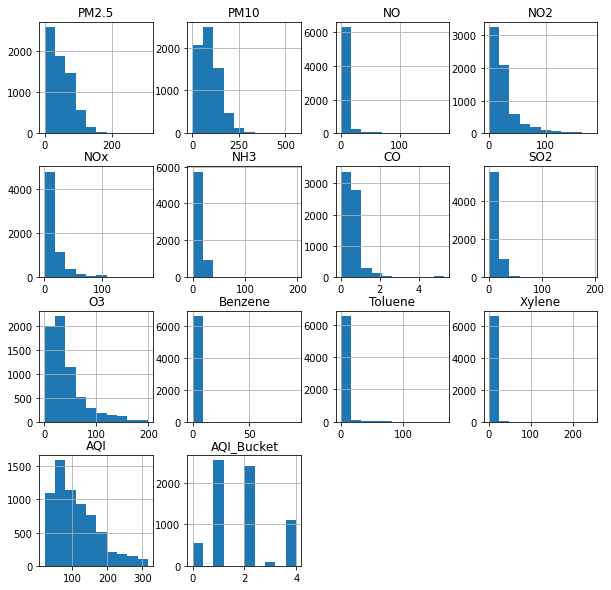

In [ ]:
# plot the histogram 
new_dataset.hist(figsize=(10,10))

In [ ]:
# split the data to features and labels 
x=new_dataset.iloc[:,:-1]
y=new_dataset.iloc[:,-1]

In [ ]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.MinMaxScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3dcc4d28d0>,
      dtype=object)

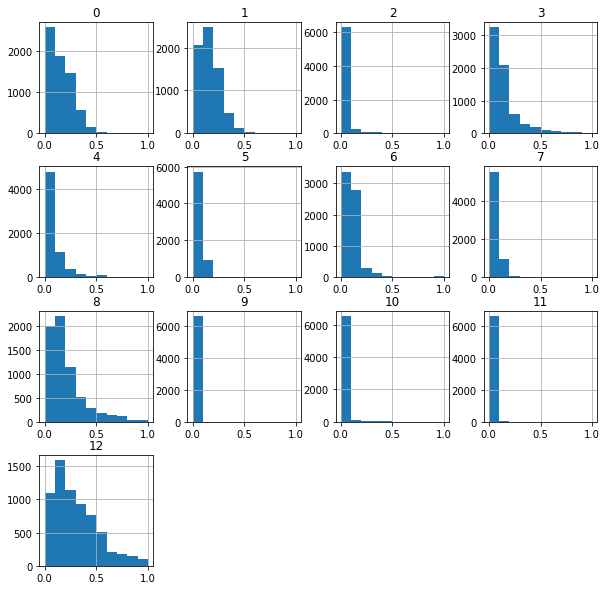

In [ ]:
pd.DataFrame(x_norm).hist(figsize=(10,10))

In [ ]:
#split the data into a training set and testing set.
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
y_train = tf.one_hot(y_train,depth=len(set(y)))
y_test = tf.one_hot(y_test,depth=len(set(y)))

# Create the Data Pipeline

In [ ]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [ ]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [ ]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[2.99837925e-02 4.03768506e-02 8.49874515e-03 5.01841368e-02
  3.27713265e-02 4.80113206e-02 9.05660377e-02 5.89834333e-02
  9.83343367e-02 1.09769484e-03 2.12056952e-02 4.04530744e-04
  5.06756757e-02]
 [6.32090762e-02 1.33692239e-01 2.46406571e-02 1.05535096e-01
  7.56476105e-02 2.80487189e-02 9.24528302e-02 3.62619890e-02
  8.90527795e-02 1.31723381e-03 1.12087246e-02 8.09061489e-04
  3.81756757e-01]
 [1.02106969e-01 1.55226559e-01 3.53639060e-03 7.18957841e-02
  4.01406878e-02 4.54844090e-02 9.81132075e-02 1.46176335e-02
  3.56712824e-01 4.39077936e-03 7.27052408e-03 4.04530744e-04
  1.99324324e-01]
 [2.34197731e-01 1.89322566e-01 2.28154232e-03 9.39921948e-02
  5.17530147e-02 9.22322737e-02 9.43396226e-03 2.36959532e-02
  1.71583384e-01 1.09769484e-03 4.02908210e-02 1.21359223e-04
  3.47972973e-01]
 [1.22366288e-01 2.22072678e-01 3.70750627e-03 1.05919859e-01
  5.90107191e-02 2.37529691e-02 1.07547170e-01 6.75488537e-02
  2.42825607e-01 0.00000000e+00 4.72584065e-03 4.

# Create the Model

In [ ]:
class Model(tf.keras.Model):
    def __init__(self,units_tuner,activation_tuner,kernel_regularizer_tuner,dropout_tuner):
        super(Model,self).__init__()
        self.dropout_tuner=dropout_tuner
        activation_tuner=[tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu][activation_tuner]


        self.D1=tf.keras.layers.Dense(units_tuner[0],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[0],name='D1')
        self.D1_dropout = tf.keras.layers.Dropout(0.3)
        self.D2=tf.keras.layers.Dense(units_tuner[1],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[1],name='D2')
        self.D2_dropout = tf.keras.layers.Dropout(0.3)
        self.D3=tf.keras.layers.Dense(units_tuner[2],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[2],name='D3')
        self.D3_dropout = tf.keras.layers.Dropout(0.3)
        self.D4=tf.keras.layers.Dense(units_tuner[3],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[3],name='D4')
        self.D4_dropout = tf.keras.layers.Dropout(0.3)
        self.D5=tf.keras.layers.Dense(units_tuner[4],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[4],name='D5')
        self.D5_dropout = tf.keras.layers.Dropout(0.3)
        self.out=tf.keras.layers.Dense(5,activation=tf.nn.softmax,name='out')
    def call(self,x ):
        x=self.D1(x)
        if self.dropout_tuner:
            x=self.D1_dropout(x)
        x=self.D2(x)
        if self.dropout_tuner:
            x=self.D2_dropout(x)
        x=self.D3(x)
        if self.dropout_tuner:
            x=self.D3_dropout(x)
        x=self.D4(x)
        if self.dropout_tuner:
            x=self.D4_dropout(x)
        x=self.D5(x)
        if self.dropout_tuner:
            x=self.D5_dropout(x)
        out = self.out(x)
        return out

In [ ]:
def model_builder(hp):
    # define the kernel values tuner 
    units_tuner=[hp.Int('D1', min_value=8, max_value=512, step=32),
                  hp.Int('D2', min_value=8, max_value=512, step=32),
                  hp.Int('D3', min_value=8, max_value=512, step=32),
                  hp.Int('D4', min_value=8, max_value=512, step=32),
                  hp.Int('D5', min_value=8, max_value=512, step=32)]
                 
    # define the activation function tuner 
    activation_tuner = hp.Choice('activation',[0,1,2])

    # define the kernel_regularizer_tuner
    kernel_regularizer_tuner=[hp.Choice('regularizer_1',['L1','L2','L1L2']),
                              hp.Choice('regularizer_2',['L1','L2','L1L2']),
                              hp.Choice('regularizer_3',['L1','L2','L1L2']),
                              hp.Choice('regularizer_4',['L1','L2','L1L2']),
                              hp.Choice('regularizer_5',['L1','L2','L1L2']),
                              ]
    # define the dropout_tuner
    dropout_tuner= hp.Choice('dropout',[True,False])
    
    
    model = Model(
                      units_tuner=units_tuner,
                      activation_tuner=activation_tuner,
                      kernel_regularizer_tuner=kernel_regularizer_tuner,
                      dropout_tuner=dropout_tuner,
                     
                      )
    
    model.build((None,13))# build the model 
    
    # define the learning rate tuner 
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # compile the model 
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
    )
    return model 

In [ ]:
tuner = kt.BayesianOptimization(model_builder,
                     objective='val_loss',
                     max_trials=10,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
tuner.search(train_dataset, epochs=50,validation_data=test_dataset , callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 00m 52s]
val_loss: 0.12878701090812683

Best val_loss So Far: 0.11135311424732208
Total elapsed time: 00h 07m 54s


In [ ]:
a=tuner.get_best_hyperparameters()[0]
a.values

{'D1': 488,
 'D2': 488,
 'D3': 8,
 'D4': 8,
 'D5': 104,
 'activation': 2,
 'regularizer_1': 'L1L2',
 'regularizer_2': 'L1L2',
 'regularizer_3': 'L1L2',
 'regularizer_4': 'L1L2',
 'regularizer_5': 'L1',
 'dropout': 1,
 'lr': 0.007267190020730941}

In [ ]:
#Get optimal hyperparameters and models from the tuner
model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  multiple                  6832      
                                                                 
 dropout_5 (Dropout)         multiple                  0         
                                                                 
 D2 (Dense)                  multiple                  238632    
                                                                 
 dropout_6 (Dropout)         multiple                  0         
                                                                 
 D3 (Dense)                  multiple                  3912      
                                                                 
 dropout_7 (Dropout)         multiple                  0         
                                                                 
 D4 (Dense)                  multiple                  72  

In [ ]:
model.fit(train_dataset,epochs=50,validation_data=test_dataset)

Epoch 1/50
167/167 [==============================] - 2s 9ms/step - loss: 0.4604 - accuracy: 0.6747 - val_loss: 0.2079 - val_accuracy: 0.8494
Epoch 2/50
167/167 [==============================] - 1s 9ms/step - loss: 0.3011 - accuracy: 0.7806 - val_loss: 0.2082 - val_accuracy: 0.8404
Epoch 3/50
167/167 [==============================] - 1s 8ms/step - loss: 0.2861 - accuracy: 0.7958 - val_loss: 0.2236 - val_accuracy: 0.8524
Epoch 4/50
167/167 [==============================] - 1s 8ms/step - loss: 0.2908 - accuracy: 0.8162 - val_loss: 0.2364 - val_accuracy: 0.9236
Epoch 5/50
167/167 [==============================] - 2s 10ms/step - loss: 0.2820 - accuracy: 0.8164 - val_loss: 0.2198 - val_accuracy: 0.9288
Epoch 6/50
167/167 [==============================] - 1s 8ms/step - loss: 0.2666 - accuracy: 0.8316 - val_loss: 0.2665 - val_accuracy: 0.8292
Epoch 7/50
167/167 [==============================] - 1s 8ms/step - loss: 0.2562 - accuracy: 0.8235 - val_loss: 0.1748 - val_accuracy: 0.9064
Epoch

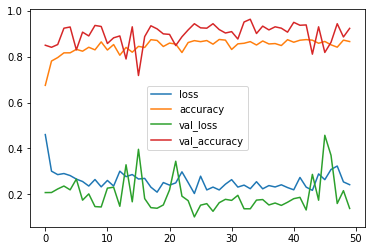

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    preds=np.append(preds,pred)
    y= np.argmax(y,axis=-1)
  
    ys=np.append(ys,y)
    

100%|██████████| 42/42 [00:02<00:00, 17.32it/s]


In [ ]:
preds.shape

(1335,)

## Model Evaluation 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_score: 0.9228464419475655
precision_score: 0.9121908339303704
recall_score: 0.9228464419475655
f1_score: 0.9148895742007235


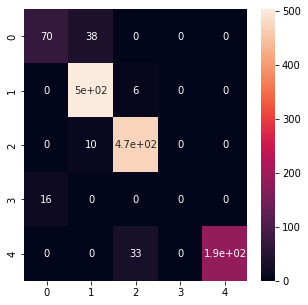

In [ ]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)
plt.figure(figsize=(5,5))
sn.heatmap(confion_metrix,annot=True)
